In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pwd

/content


In [ ]:
%%shell
jupyter nbconvert --to html ///content/Dec22_Murat_Goksenin_Guzel_Project4_v2_2.ipynb

[NbConvertApp] Converting notebook ///content/Dec22_Murat_Goksenin_Guzel_Project4_v2_2.ipynb to html
[NbConvertApp] Writing 6772487 bytes to /content/Dec22_Murat_Goksenin_Guzel_Project4_v2_2.html


## 1-LOADING LIBRARIES

In [ ]:
!pip install nb_black

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np


# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay as plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier


##2-LOADING AND EXPLORING DATA

- Loading Data Form CSV

In [ ]:
Row_Data = pd.read_csv("/content/drive/MyDrive/Project4/Tourism.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = Row_Data.copy()

In [ ]:
data.head()

In [ ]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  

There are 4888 rows and 20 columns.


In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.isnull().values.any()

In [ ]:
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

In [ ]:
data.duplicated().sum()

In [ ]:
data[data.duplicated()].count()

In [ ]:
data.describe(include="all").T

In [ ]:
print(data.CustomerID.value_counts())
print(data.ProdTaken.value_counts())
print(data.Age.value_counts())
print(data.TypeofContact.value_counts())
print(data.CityTier.value_counts())
print(data.DurationOfPitch.value_counts())
print(data.Occupation.value_counts())
print(data.Gender.value_counts())
print(data.NumberOfPersonVisiting.value_counts())
print(data.NumberOfFollowups.value_counts())
print(data.ProductPitched.value_counts())
print(data.MaritalStatus.value_counts())
print(data.NumberOfTrips.value_counts())
print(data.Passport.value_counts())
print(data.PitchSatisfactionScore.value_counts())
print(data.OwnCar.value_counts())
print(data.NumberOfChildrenVisiting.value_counts())
print(data.Designation.value_counts())
print(data.MonthlyIncome.value_counts())


##3-EXPLOTARY DATA ANALYSIS

In [ ]:
data_EDA=data.copy()

In [ ]:
data_EDA.info()

**3.1** **UNIVARITY ANALYZES**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data:    dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
histogram_boxplot(data_EDA,"Age",kde=True)

In [ ]:
data_EDA["Column"].median()

In [ ]:
data_EDA["Column"].median()

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**3.2** **BIVARIATE ANALYSIS**

Correlation Diagram


In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data_EDA.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Differentiating Numerical Columns**

In [ ]:
numeric_cols = data_EDA.select_dtypes(include=[np.number]).columns

print("Numeric Columns:    ", numeric_cols)

Numeric Columns:     Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')


**All Numerical Columns Analyzsis**

In [ ]:
data_EDA[numeric_cols].hist(figsize=(14, 14))
plt.show()

**Distribution with Box Plot**

In [ ]:
distribution_plot_wrt_target(data_EDA, "Age", "NumberOfTrips")

**SNS Pairplot -Showing all relations based on target value**

In [ ]:
sns.pairplot(data=data_EDA,hue="ProductPitched", diag_kind="kde")
plt.show()

In [ ]:
sns.lmplot(data=data_EDA, x='Age', y='MonthlyIncome')

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Ditribution Of Age**

In [ ]:
labeled_barplot(data_EDA, "Age", perc=True)

**Distribution of Pitch Satisfaction Score**

In [ ]:
labeled_barplot(data_EDA, "PitchSatisfactionScore", perc=True)

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_EDA, x = data_EDA["ProductPitched"],hue=data_EDA["MaritalStatus"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

Group By Target Value 

In [ ]:
# Mean of numerical variables grouped by attrition
data_EDA.groupby(["Attrition_Flag"])[numeric_cols].mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,
Attrited Customer,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


##4-DATA PREPROSESSING

Copying data_EDA to data_pre_process Data Frame for abstraction

In [ ]:
data_pre_process=data_EDA.copy()

In [ ]:
data_pre_process.info()

**DATA PRE-PROCESSING FOR Gender String Error**

In [ ]:
data_pre_process["Gender"].replace("Fe Male", "Female", inplace=True)

In [ ]:
data_pre_process["Gender"]

In [ ]:
data_pre_process.isnull().sum()

**Missing Value Treatment**

**Check for ROWS Having Multiple Missing Values**

In [ ]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = data_pre_process[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

In [ ]:
data_pre_process.isnull().sum()[data_pre_process.isnull().sum() > 0]

**DATA PRE-PROCESSING FOR AGE**

In [ ]:
(sum(data_pre_process['Age'].isna())/data_pre_process.shape[0])*100

In [ ]:
data_pre_process["Age"].describe()

In [ ]:
data_pre_process['Age']=data_pre_process["Age"].fillna(data_pre_process['Age'].median())

In [ ]:
data_pre_process.MaritalStatus = data_pre_process.MaritalStatus.str.replace(
    " ", ""
)  # remove empty spaces from strings

married = ["Married"]
not_married = ["Divorced", "Single", "Unmarried"]


def reduce_marital_status(x):
    if x in married:
        return "married"
    elif x in not_married:
        return "not_married"
    else:
        return x

In [ ]:
data_pre_process.MaritalStatus = data_pre_process.MaritalStatus.apply(reduce_marital_status)

In [ ]:
replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 } 
                    }
oneHotCols=["purpose","housing","other_credit","job"]


Converting Object Columns to Categorical Columns

In [ ]:
cat_cols = [
    "CityTier",
    "PreferredPropertyStar",
    "PitchSatisfactionScore",
    "OwnCar",
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",    
    "Passport",
    "ProdTaken",
]
data_pre_process[cat_cols] = data_pre_process[cat_cols].astype("category")

In [ ]:
data_pre_process["Age"]=data_pre_process["Age"].astype(int)

In [ ]:
data_pre_process.isnull().sum()

MAP FUNCTION BELOW IS A NICE FUNCTION

In [ ]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
gender = {"Male": 0, "Female": 1, "Other": 2}
data1["gender"] = data1["gender"].map(gender)

enrolled_university = {"no_enrollment": 0, "Full time course": 1, "Part time course": 2}
data1["enrolled_university"] = data1["enrolled_university"].map(enrolled_university)

education_level = {
    "Graduate": 0,
    "Masters": 1,
    "High School": 2,
    "Phd": 3,
    "Primary School": 4,
}
data1["education_level"] = data1["education_level"].map(education_level)

major_discipline = {
    "STEM": 0,
    "Business Degree": 1,
    "Arts": 2,
    "Humanities": 3,
    "No Major": 4,
    "Other": 5,
}
data1["major_discipline"] = data1["major_discipline"].map(major_discipline)

experience = {
    "<1": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
    "6": 6,
    "7": 7,
    "8": 8,
    "9": 9,
    "10": 10,
    "11": 11,
    "12": 12,
    "13": 13,
    "14": 14,
    "15": 15,
    "16": 16,
    "17": 17,
    "18": 18,
    "19": 19,
    "20": 20,
    ">20": 21,
}
data1["experience"] = data1["experience"].map(experience)

company_type = {
    "Pvt Ltd": 0,
    "Funded Startup": 1,
    "Early Stage Startup": 2,
    "Other": 3,
    "Public Sector": 4,
    "NGO": 5,
}
data1["company_type"] = data1["company_type"].map(company_type)

company_size = {
    "<10": 0,
    "10/49": 1,
    "100-500": 2,
    "1000-4999": 3,
    "10000+": 4,
    "50-99": 5,
    "500-999": 6,
    "5000-9999": 7,
}
data1["company_size"] = data1["company_size"].map(company_size)

last_new_job = {"never": 0, "1": 1, "2": 2, "3": 3, "4": 4, ">4": 5}
data1["last_new_job"] = data1["last_new_job"].map(last_new_job)

<IPython.core.display.Javascript object>

**4.4 Outliers detection using boxplot**

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
numerical_col = data_pre_process.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data_pre_process[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**4.5 Outliers detection using boxplot**

In [ ]:
numerical_col = data_pre_process.select_dtypes(include=np.number).columns.tolist()
data_pre_process = treat_outliers_all(data_pre_process, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data_pre_process[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

##5-FEATURE ENGINEERING 


In [ ]:
y = data1["target"].apply(lambda x: 1 if x == "yes" else 0)

In [ ]:
gender = {"Male": 0, "Female": 1, "Other": 2}
data1["gender"] = data1["gender"].map(gender)

enrolled_university = {"no_enrollment": 0, "Full time course": 1, "Part time course": 2}
data1["enrolled_university"] = data1["enrolled_university"].map(enrolled_university)

In [ ]:
data1["major_discipline"] = data1["major_discipline"].map(major_discipline)

experience = {
    "<1": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
    "6": 6,
    "7": 7,
    "8": 8,
    "9": 9,
    "10": 10,
    "11": 11,
    "12": 12,
    "13": 13,
    "14": 14,
    "15": 15,
    "16": 16,
    "17": 17,
    "18": 18,
    "19": 19,
    "20": 20,
    ">20": 21,
}

In [ ]:
data["Gender"] = data["Gender"].astype("category")

In [ ]:
data["UnderRisk"].value_counts(1)

In [ ]:
# Let's impute the missing values
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")

# fit the imputer on train data and transform the train data
X_train["income"] = imp_median.fit_transform(X_train[["income"]])

# transform the validation and test data using the imputer fit on train data
X_val["income"] = imp_median.transform(X_val[["income"]])
X_test["income"] = imp_median.transform(X_test[["income"]])

Splitting Test,Train abd Variant set

In [ ]:
X = data_model.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data_model['ProdTaken']

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

In [ ]:
X_test, X_temp, y_test, y_temp = train_test_split(
    X, y, test_size=0.8, random_state=1, stratify=y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

In [ ]:
print("UnderRisk value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("UnderRisk value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("UnderRisk value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("UnderRisk value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Over Sampling

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

**kFold**

In [ ]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()


# fit a simple linear model

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 2.5059518049385052
The coefficient for disp is 2.535708286056052
The coefficient for hp is -1.7889335736325254
The coefficient for wt is -5.551819873098726
The coefficient for acc is 0.11485734803440907
The coefficient for yr is 2.931846548211611
The coefficient for car_type is 2.977869737601943
The coefficient for origin_america is -0.5832955290165979
The coefficient for origin_asia is 0.3474931380432245
The coefficient for origin_europe is 0.37741646808688323


In [ ]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 23.665107741982705


# Create a regularized RIDGE model and note the coefficients

In [ ]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[ 2.47057467  2.44494419 -1.78573889 -5.47285499  0.10115618  2.92319984
   2.94492098 -0.57949986  0.34667456  0.37344909]]


# Create a regularized LASSO model and note the coefficients

In [ ]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.          0.         -0.3475456  -4.01181473  0.          2.64248634
  1.07111166 -0.54724128  0.          0.        ]


## Let us compare their scores

In [ ]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.8343770256960538
0.8513421387780066


In [ ]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8343617931312616
0.8518882171608505


In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8114389394513553
0.8547810865027448


In [ ]:
# More or less similar results but with less complex models.  Complexity is a function of variables and coefficients
## Note - with Lasso, we get equally good result in test though not so in training.  Further, the number of dimensions is much less
# in LASSO model than ridge or un-regularized model

# Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [ ]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(278, 56)

# Fit a simple non regularized linear model on poly features-

In [ ]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])


[ 3.24082770e-13 -1.14204220e+12 -4.43738735e+00 -2.24947964e+00
 -2.98166341e+00 -1.56730367e+00  3.00442772e+00 -1.52060575e+12
 -7.80788356e+11  3.71375223e+12 -3.23609457e+12 -1.15918732e+00
 -1.43925476e+00 -3.57818604e-03  2.58444214e+00 -1.91918182e+00
 -3.65891647e+12 -6.45319147e+12 -2.39436996e+12 -2.28543203e+12
  3.90441895e-01  2.09503174e-01 -4.23446655e-01  3.58471680e+00
 -2.02703094e+00 -9.03672940e+11 -7.44778888e+11 -7.10893285e+11
  2.47772217e-01 -6.70440674e-01 -1.92620850e+00 -7.47558594e-01
 -2.15947171e+11 -1.77976884e+11 -1.69879374e+11 -1.72500610e-01
  5.30212402e-01 -3.32050323e+00  1.69388998e+12  1.39605098e+12
  1.33253411e+12  5.85876465e-01  1.53894043e+00  4.76389633e+11
  3.92625390e+11  3.74761903e+11  4.00207520e-01 -1.27131857e+10
 -1.04778089e+10 -1.00010944e+10 -1.09798815e+12  8.13175594e+11
  7.76178109e+11  2.20248210e+11 -5.15971535e+12  2.83957085e+12]


In [ ]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.          3.73512981 -2.93500874 -2.13974194 -3.56547812 -1.28898893
   3.01290805  2.04739082  0.0786974   0.21972225 -0.3302341  -1.46231096
  -1.17221896  0.00856067  2.48054694 -1.67596093  0.99537516 -2.29024279
   4.7699338  -2.08598898  0.34009408  0.35024058 -0.41761834  3.06970569
  -2.21649433  1.86339518 -2.62934278  0.38596397  0.12088534 -0.53440382
  -1.88265835 -0.7675926  -0.90146842  0.52416091  0.59678246 -0.26349448
   0.5827378  -3.02842915 -0.36548074  0.5956112  -0.15941014  0.49168856
   1.45652375 -0.43819158 -0.20964198  0.77665496  0.36489921 -0.4750838
   0.3551047   0.23188557 -1.42941282  2.06831543 -0.34986402 -0.32320394
   0.39054656  0.06283411]]


In [ ]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


0.9143225702003365
0.8613398053698541


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.         -0.         -0.         -1.59613165 -5.22452383 -0.
  2.86907439  0.03030592 -0.10514919  0.          0.         -0.
 -0.          0.          0.28971732 -0.          0.         -0.
  0.11457443 -0.          0.          1.15720495  0.          0.
 -0.          0.          0.         -0.          0.04724906  0.
 -0.6925298  -0.          0.          0.         -0.         -0.
 -0.         -0.67082659  0.         -0.         -0.          0.16918498
 -0.         -0.61771612  0.          0.36046427  0.         -0.37086554
  0.          0.         -0.         -0.          0.18165859 -0.
 -0.         -0.        ]


In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))


0.8900519684208551
0.8802228448476971


##6-MODEL BUILDING 

**6.1** **BAGGING**

In [ ]:
data_pre_process["ProdTaken"]=data_pre_process["ProdTaken"].astype(int)

In [ ]:
data_model=data_pre_process.copy()

In [ ]:
data_model.info()

In [ ]:
data_model.drop(['OwnCar'],axis=1)

In [ ]:
X = data_model.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data_model['ProdTaken']

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

In [ ]:
y_train.value_counts(1)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**6.1 *italicized text*.1** **Build Decision Tree And Logistic Regression Model**



In [ ]:
lr_estimator = LogisticRegression(random_state=1, solver="saga")

In [ ]:
lr_estimator.fit(X_train_over, y_train_over)

In [ ]:
log_reg_reg_train_perf = model_performance_classification_sklearn(
    lr_estimator, X_train_over, y_train_over)

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1)

In [ ]:
dtree.fit(X_train, y_train)

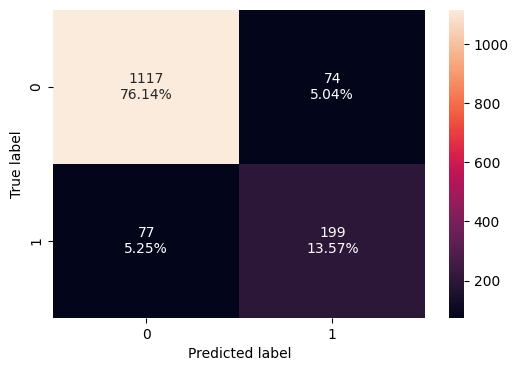

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [ ]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

In [ ]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

**6.1.2** **Bagging Classifier**


In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

In [ ]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

**6.1.3** **Bagging Classifier with weighted decision tree**


In [ ]:
y_train.value_counts(1)

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.18,1:0.82},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

In [ ]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [ ]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

In [ ]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

**6.1.3** **Random Forest**

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

In [ ]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

In [ ]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

**6.1.4** **Random Forest with weighted decision tree**

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.18,1:0.82}, random_state=1)
rf_wt.fit(X_train,y_train)

In [ ]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [ ]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

In [ ]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

**6.1.5** **Tuning Models**

**6.1.5.1** **Tuning Decision Tree**

In [ ]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1,5,7,10],
              'max_leaf_nodes' : [2,5,10,15, None],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [ ]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

In [ ]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

**6.1.5.2** **Tuning Bagging Classifier**


In [ ]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

In [ ]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

In [ ]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [ ]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

In [ ]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

**6.1.5.2** **Tuning Random Forest**


In [ ]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [ ]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

In [ ]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

**6.1.6** **Comparing All Models**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T,dtree_estimator_model_train_perf.T, bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,1.0,0.994446,0.995908,1.0,1.0,0.992400,1.0,1.0
Recall,1.0,0.972050,0.979814,1.0,1.0,0.961180,1.0,1.0
Precision,1.0,0.998405,0.998418,1.0,1.0,0.998387,1.0,1.0
F1,1.0,0.985051,0.989028,1.0,1.0,0.979430,1.0,1.0


In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T,dtree_estimator_model_test_perf.T, bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,0.897069,0.907294,0.904567,0.923654,0.907294,0.903885,0.922972,0.922972
Recall,0.721014,0.619565,0.572464,0.626812,0.543478,0.713768,0.655797,0.670290
Precision,0.728938,0.846535,0.877778,0.950549,0.937500,0.760618,0.909548,0.893720
F1,0.724954,0.715481,0.692982,0.755459,0.688073,0.736449,0.762105,0.766046


**6.1.7** **Feature importance of Random Forest**


In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns

In [ ]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on Random Forest Fetures importance digaram Age, Mounthly Income and duration of pitch have higher priorities than other metrics 

**6.2** **BOOSTING**

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

**6.2.1** **AdaBoost Classifier**


In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

In [ ]:
abc_score=get_metrics_score(abc)

In [ ]:
make_confusion_matrix(abc,y_test)

**6.2.2** **Gradient Boosting Classifier**


In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

In [ ]:
gbc_score=get_metrics_score(gbc)

In [ ]:
make_confusion_matrix(gbc,y_test)

**6.2.3** **XGBoost Classifier**


In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train, y_train)

In [ ]:
xgb_score=get_metrics_score(xgb)

In [ ]:
make_confusion_matrix(xgb,y_test)

**6.2.4** **Hyperparameter Tuning**


**6.2.4.1** **AdaBoost Tuning**

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

In [ ]:
abc_tuned_score=get_metrics_score(abc_tuned)

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**6.2.4.2** **Gradient Boosting Tuning**


**Using AdaBoost classifier as the estimator for initial predictions**

In [ ]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

In [ ]:
gbc_init_score=get_metrics_score(gbc_init)

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
gbc_tuned_score=get_metrics_score(gbc_tuned)

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**6.2.4.3** **XGB Tuning**

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train, y_train)

In [ ]:
xgb_score=get_metrics_score(xgb)

In [ ]:
make_confusion_matrix(xgb,y_test)

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,50,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.1,0.05],
    "gamma":[0,3],
    "colsample_bytree":[0.5,0.9,1],
    "colsample_bylevel":[0.5,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [ ]:
xgb_tuned_score=get_metrics_score(xgb_tuned)

In [ ]:
make_confusion_matrix(xgb_tuned,y_test)

In [ ]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**6.2.5** **Comparing all models**


In [ ]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame